# Body Shape Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import sklearn as sklearn
from sklearn.cluster import KMeans
import seaborn as sns; sns.set() 
import cv2

## Original Data

In [2]:
bods = pd.read_csv('bdims.csv')

In [3]:
bods.head()

,bia.di,bii.di,bit.di,che.de,che.di,elb.di,wri.di,kne.di,ank.di,sho.gi,...,bic.gi,for.gi,kne.gi,cal.gi,ank.gi,wri.gi,age,wgt,hgt,sex
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1


In [4]:
bods.corr(method = 'pearson', min_periods = 1)

,bia.di,bii.di,bit.di,che.de,che.di,elb.di,wri.di,kne.di,ank.di,sho.gi,...,bic.gi,for.gi,kne.gi,cal.gi,ank.gi,wri.gi,age,wgt,hgt,sex
bia.di,1.000000,0.309036,0.486273,0.583258,0.769141,0.765821,0.722839,0.635962,0.661416,0.792596,...,0.695062,0.752642,0.507907,0.510814,0.603468,0.771598,0.086084,0.725414,0.748922,0.774948
bii.di,0.309036,1.000000,0.673457,0.356785,0.331169,0.322857,0.279236,0.437788,0.368313,0.277239,...,0.299107,0.289682,0.472469,0.407064,0.335818,0.263255,0.247878,0.495757,0.381424,0.115645
bit.di,0.486273,0.673457,1.000000,0.472556,0.524129,0.525758,0.468158,0.608302,0.495406,0.478764,...,0.480146,0.478085,0.623355,0.592980,0.539063,0.479517,0.271144,0.665725,0.485279,0.262415
che.de,0.583258,0.356785,0.472556,1.000000,0.665070,0.665238,0.608115,0.550289,0.597854,0.737612,...,0.732898,0.717549,0.563652,0.553502,0.587343,0.680241,0.315405,0.800731,0.552911,0.612886
che.di,0.769141,0.331169,0.524129,0.665070,1.000000,0.758868,0.730864,0.659065,0.668539,0.870648,...,0.792334,0.807118,0.592872,0.596909,0.635021,0.760893,0.192888,0.831465,0.626893,0.702901
elb.di,0.765821,0.322857,0.525758,0.665238,0.758868,1.000000,0.839931,0.731504,0.821098,0.819470,...,0.804784,0.858206,0.590979,0.579908,0.664162,0.845756,0.198590,0.801194,0.738113,0.772980
wri.di,0.722839,0.279236,0.468158,0.608115,0.730864,0.839931,1.000000,0.712484,0.772449,0.778399,...,0.762159,0.814709,0.581874,0.581438,0.654694,0.862553,0.207080,0.764605,0.677962,0.726855
kne.di,0.635962,0.437788,0.608302,0.550289,0.659065,0.731504,0.712484,1.000000,0.723273,0.681802,...,0.681405,0.720652,0.733818,0.686093,0.654707,0.731180,0.172336,0.766048,0.588095,0.543926
ank.di,0.661416,0.368313,0.495406,0.597854,0.668539,0.821098,0.772449,0.723273,1.000000,0.692111,...,0.686289,0.735250,0.542354,0.543616,0.677230,0.762749,0.239044,0.726468,0.686451,0.688949
sho.gi,0.792596,0.277239,0.478764,0.737612,0.870648,0.819470,0.778399,0.681802,0.692111,1.000000,...,0.895188,0.894984,0.624783,0.627054,0.679757,0.840709,0.176838,0.878834,0.665735,0.781142


In [5]:
bods.columns

Index(['bia.di', 'bii.di', 'bit.di', 'che.de', 'che.di', 'elb.di', 'wri.di',
       'kne.di', 'ank.di', 'sho.gi', 'che.gi', 'wai.gi', 'nav.gi', 'hip.gi',
       'thi.gi', 'bic.gi', 'for.gi', 'kne.gi', 'cal.gi', 'ank.gi', 'wri.gi',
       'age', 'wgt', 'hgt', 'sex'],
      dtype='object')

## Cleaning Process

In [6]:
bods.drop(["bit.di","che.de","che.di","elb.di","wri.di","kne.di","ank.di","nav.gi","thi.gi","bic.gi","for.gi","kne.gi","cal.gi","ank.gi","wri.gi"], axis=1,inplace=True)
bods.head()
bods.columns=["shoulders","hips","shld_grth","chst_grth","waist_grth","hip_grth","age","weigth","height","sex"]

In [7]:
bods.head()

,shoulders,hips,shld_grth,chst_grth,waist_grth,hip_grth,age,weigth,height,sex
0,42.9,26.0,106.2,89.5,71.5,93.5,21,65.6,174.0,1
1,43.7,28.5,110.5,97.0,79.0,94.8,23,71.8,175.3,1
2,40.1,28.2,115.1,97.5,83.2,95.0,28,80.7,193.5,1
3,44.3,29.9,104.5,97.0,77.8,94.0,23,72.6,186.5,1
4,42.5,29.9,107.5,97.5,80.0,98.5,22,78.8,187.2,1


## Getting Ratios 

In [8]:
bods['Waist_to_Hip'] = bods['waist_grth']/bods['hip_grth']

In [9]:
bods['Shoulder_to_Hip'] = bods['shld_grth']/bods['hip_grth']

In [10]:
bods.head()

,shoulders,hips,shld_grth,chst_grth,waist_grth,hip_grth,age,weigth,height,sex,Waist_to_Hip,Shoulder_to_Hip
0,42.9,26.0,106.2,89.5,71.5,93.5,21,65.6,174.0,1,0.764706,1.135829
1,43.7,28.5,110.5,97.0,79.0,94.8,23,71.8,175.3,1,0.833333,1.165612
2,40.1,28.2,115.1,97.5,83.2,95.0,28,80.7,193.5,1,0.875789,1.211579
3,44.3,29.9,104.5,97.0,77.8,94.0,23,72.6,186.5,1,0.827660,1.111702
4,42.5,29.9,107.5,97.5,80.0,98.5,22,78.8,187.2,1,0.812183,1.091371


In [11]:
bods.corr(method = 'pearson', min_periods = 1)

,shoulders,hips,shld_grth,chst_grth,waist_grth,hip_grth,age,weigth,height,sex,Waist_to_Hip,Shoulder_to_Hip
shoulders,1.000000,0.309036,0.792596,0.721840,0.641607,0.340061,0.086084,0.725414,0.748922,0.774948,0.643483,0.635909
hips,0.309036,1.000000,0.277239,0.325684,0.434700,0.564153,0.247878,0.495757,0.381424,0.115645,0.215895,-0.147120
shld_grth,0.792596,0.277239,1.000000,0.927192,0.823455,0.533672,0.176838,0.878834,0.665735,0.781142,0.758563,0.716926
chst_grth,0.721840,0.325684,0.927192,1.000000,0.883799,0.583499,0.248967,0.898959,0.618731,0.744928,0.804737,0.591159
waist_grth,0.641607,0.434700,0.823455,0.883799,1.000000,0.692351,0.369131,0.903991,0.552960,0.669203,0.885228,0.381115
hip_grth,0.340061,0.564153,0.533672,0.583499,0.692351,1.000000,0.227080,0.762969,0.338584,0.158058,0.280290,-0.204175
age,0.086084,0.247878,0.176838,0.248967,0.369131,0.227080,1.000000,0.207265,0.067883,0.150945,0.345141,0.016272
weigth,0.725414,0.495757,0.878834,0.898959,0.903991,0.762969,0.207265,1.000000,0.717301,0.657726,0.713746,0.386218
height,0.748922,0.381424,0.665735,0.618731,0.552960,0.338584,0.067883,0.717301,1.000000,0.684662,0.522284,0.485140
sex,0.774948,0.115645,0.781142,0.744928,0.669203,0.158058,0.150945,0.657726,0.684662,1.000000,0.797961,0.775145


In [12]:
man = bods.loc[bods['sex'] == 1]
fem = bods.loc[bods['sex'] == 0]

In [13]:
man.head()

,shoulders,hips,shld_grth,chst_grth,waist_grth,hip_grth,age,weigth,height,sex,Waist_to_Hip,Shoulder_to_Hip
0,42.9,26.0,106.2,89.5,71.5,93.5,21,65.6,174.0,1,0.764706,1.135829
1,43.7,28.5,110.5,97.0,79.0,94.8,23,71.8,175.3,1,0.833333,1.165612
2,40.1,28.2,115.1,97.5,83.2,95.0,28,80.7,193.5,1,0.875789,1.211579
3,44.3,29.9,104.5,97.0,77.8,94.0,23,72.6,186.5,1,0.827660,1.111702
4,42.5,29.9,107.5,97.5,80.0,98.5,22,78.8,187.2,1,0.812183,1.091371


In [33]:
man.corr(method = 'pearson', min_periods = 1)

,shoulders,hips,shld_grth,chst_grth,waist_grth,hip_grth,age,weigth,height,sex,Waist_to_Hip,Shoulder_to_Hip
shoulders,1.000000,0.349076,0.402419,0.288420,0.175709,0.316488,-0.100997,0.416675,0.476531,NaN,-0.027042,0.047124
hips,0.349076,1.000000,0.323054,0.327115,0.494166,0.570917,0.187638,0.583681,0.420848,NaN,0.231726,-0.366801
shld_grth,0.402419,0.323054,1.000000,0.834906,0.580925,0.651732,0.083078,0.763659,0.296867,NaN,0.292229,0.291190
chst_grth,0.288420,0.327115,0.834906,1.000000,0.713408,0.682284,0.223786,0.793942,0.245381,NaN,0.473701,0.069117
waist_grth,0.175709,0.494166,0.580925,0.713408,1.000000,0.799678,0.457106,0.805138,0.205929,NaN,0.811585,-0.362050
hip_grth,0.316488,0.570917,0.651732,0.682284,0.799678,1.000000,0.178401,0.877427,0.346514,NaN,0.299858,-0.533760
age,-0.100997,0.187638,0.083078,0.223786,0.457106,0.178401,1.000000,0.144425,-0.037380,NaN,0.556793,-0.138277
weigth,0.416675,0.583681,0.763659,0.793942,0.805138,0.877427,0.144425,1.000000,0.534742,NaN,0.427201,-0.259249
height,0.476531,0.420848,0.296867,0.245381,0.205929,0.346514,-0.037380,0.534742,1.000000,NaN,-0.009196,-0.116546
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Man Data

In [14]:
mx = man['Waist_to_Hip']
my = man['Shoulder_to_Hip']

In [15]:
ms = man['shoulders']
mh = man['hips']

In [16]:
mt = man['height']
mw = man['weigth']

In [17]:
M = [(man['Waist_to_Hip'].iloc[X],man['Shoulder_to_Hip'].iloc[X]) for X in man.index] 

In [18]:
MSH = [(man['shoulders'].iloc[X],man['hips'].iloc[X]) for X in man.index] 

In [19]:
MWH = [(man['height'].iloc[X],man['weigth'].iloc[X]) for X in man.index]

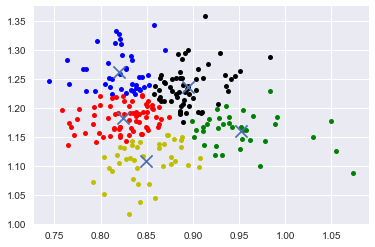

In [20]:
kM = KMeans(n_clusters = 5) 
kM.fit(M)

centroids = kM.cluster_centers_
labels = kM.labels_

#print(centroids)
#print(labels)

colors = ["g.","r.","b.","k.","y."]
for m in range(len(M)):
    #print("coordinate:",M[m],"label:", labels[m])
    plt.plot(M[m][0],M[m][1],colors[labels[m]],markersize = 10)
    
plt.scatter(centroids[:,0],centroids[:,1],marker = "x",s = 150,linewidths = 5,zorder = 10)
plt.show()

## Man Results 

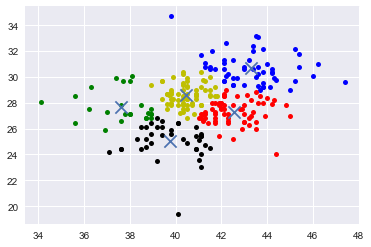

In [21]:
kMs = KMeans(n_clusters = 5) 
kMs.fit(MSH)

centroids = kMs.cluster_centers_
labels = kMs.labels_

#print(centroids)
#print(labels)

#colors = ["g.","r.","b.","k.","y."]
for m in range(len(MSH)):
    #print("coordinate:",MSH[m],"label:", labels[m])
    plt.plot(MSH[m][0],MSH[m][1],colors[labels[m]],markersize = 10)
    
plt.scatter(centroids[:,0],centroids[:,1],marker = "x",s = 150,linewidths = 5,zorder = 10)
plt.show()

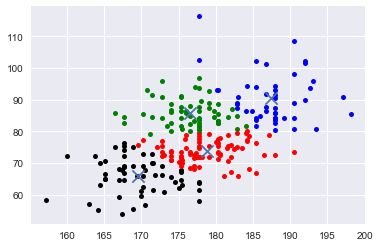

In [22]:
kMWH = KMeans(n_clusters = 4) 
kMWH.fit(MWH)

centroids = kMWH.cluster_centers_
labels = kMWH.labels_

#print(centroids)
#print(labels)

#colors = ["g.","r.","b.","k.","y."]
for mWH in range(len(MWH)):
    #print("coordinate:",M[m],"label:", labels[m])
    plt.plot(MWH[mWH][0],MWH[mWH][1],colors[labels[mWH]],markersize = 10)
    
plt.scatter(centroids[:,0],centroids[:,1],marker = "x",s = 150,linewidths = 5,zorder = 10)
plt.show()

## Female Data 

In [23]:
fem.reset_index(drop = True, inplace = True)
fem.head()

,shoulders,hips,shld_grth,chst_grth,waist_grth,hip_grth,age,weigth,height,sex,Waist_to_Hip,Shoulder_to_Hip
0,37.6,25.0,95.0,83.0,66.5,92.0,22,51.6,161.2,0,0.722826,1.032609
1,36.7,26.4,99.5,78.5,61.5,90.5,20,59.0,167.5,0,0.679558,1.099448
2,34.8,25.9,88.0,75.0,61.2,91.0,19,49.2,159.5,0,0.672527,0.967033
3,36.6,27.9,97.0,86.5,78.0,99.5,25,63.0,157.0,0,0.783920,0.974874
4,35.5,28.2,103.3,91.0,70.5,91.5,21,53.6,155.8,0,0.770492,1.128962


In [34]:
fem.corr(method = 'pearson', min_periods = 1)

,shoulders,hips,shld_grth,chst_grth,waist_grth,hip_grth,age,weigth,height,sex,Waist_to_Hip,Shoulder_to_Hip
shoulders,1.000000,0.356301,0.558235,0.413683,0.373113,0.387038,0.016419,0.498090,0.471443,NaN,0.190326,0.135902
hips,0.356301,1.000000,0.283763,0.401992,0.482078,0.545595,0.284085,0.545147,0.418508,NaN,0.185186,-0.388356
shld_grth,0.558235,0.283763,1.000000,0.827378,0.725825,0.678993,0.109479,0.790757,0.278659,NaN,0.439449,0.273956
chst_grth,0.413683,0.401992,0.827378,1.000000,0.859157,0.743957,0.185686,0.839054,0.197219,NaN,0.588942,-0.009258
waist_grth,0.373113,0.482078,0.725825,0.859157,1.000000,0.812075,0.248912,0.857715,0.137824,NaN,0.748437,-0.215680
hip_grth,0.387038,0.545595,0.678993,0.743957,0.812075,1.000000,0.240407,0.902369,0.298512,NaN,0.222845,-0.517291
age,0.016419,0.284085,0.109479,0.185686,0.248912,0.240407,1.000000,0.145816,-0.063396,NaN,0.142289,-0.187676
weigth,0.498090,0.545147,0.790757,0.839054,0.857715,0.902369,0.145816,1.000000,0.431059,NaN,0.403274,-0.260493
height,0.471443,0.418508,0.278659,0.197219,0.137824,0.298512,-0.063396,0.431059,1.000000,NaN,-0.111921,-0.080086
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
fx = fem['Waist_to_Hip']
fy = fem['Shoulder_to_Hip']

In [25]:
fs = fem['shoulders']
fh = fem['hips']

In [26]:
ft = fem['height']
fw = fem['weigth']

In [27]:
F = [(fem['Waist_to_Hip'].iloc[X],fem['Shoulder_to_Hip'].iloc[X]) for X in fem.index] 

In [28]:
FSH = [(fem['shoulders'].iloc[X],fem['hips'].iloc[X]) for X in fem.index] 

In [29]:
FWH = [(fem['height'].iloc[X],fem['weigth'].iloc[X]) for X in fem.index] 

## Female Results 

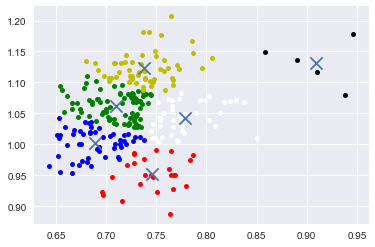

In [30]:
kF = KMeans(n_clusters = 6) 
kF.fit(F)

centroids = kF.cluster_centers_
labels = kF.labels_

#print(centroids)
#print(labels)

colors = ["g.","r.","b.","k.","y.","w."]
labels
for f in range(len(F)):
    #print("coordinate:",F[f],"label:", labels[f])
    plt.plot(F[f][0],F[f][1],colors[labels[f]],markersize = 10)
    
plt.scatter(centroids[:,0],centroids[:,1],marker = "x",s = 150,linewidths = 5,zorder = 10)
plt.show()

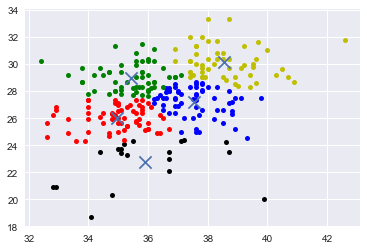

In [31]:
kFs = KMeans(n_clusters = 5) 
kFs.fit(FSH)

centroids = kFs.cluster_centers_
labels = kFs.labels_

#print(centroids)
#print(labels)

#colors = ["g.","r.","b.","k.","y."]
for f in range(len(FSH)):
    #print("coordinate:",MSH[m],"label:", labels[m])
    plt.plot(FSH[f][0],FSH[f][1],colors[labels[f]],markersize = 10)
    
plt.scatter(centroids[:,0],centroids[:,1],marker = "x",s = 150,linewidths = 5,zorder = 10)
plt.show()

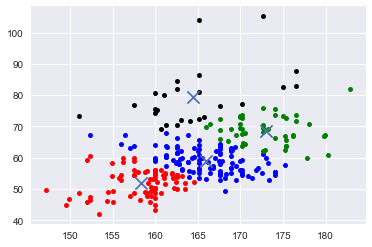

In [32]:
kFWH = KMeans(n_clusters = 4) 
kFWH.fit(FWH)

centroids = kFWH.cluster_centers_
labels = kFWH.labels_

#print(centroids)
#print(labels)

#colors = ["g.","r.","b.","k.","y."]
for fWH in range(len(FWH)):
    #print("coordinate:",M[m],"label:", labels[m])
    plt.plot(FWH[fWH][0],FWH[fWH][1],colors[labels[fWH]],markersize = 10)
    
plt.scatter(centroids[:,0],centroids[:,1],marker = "x",s = 150,linewidths = 5,zorder = 10)
plt.show()